## Project 1

### Objective - Implementing clustering techniques 

**1. About the research paper:**

**The research provided talks about network patterns of streets. For this research, 100 cities from all around the world were analyzed. It examines if a city is well-connected or not. There are a few factors that are taken into consideration to check if a city has a good street network. One of the factor checks if grid-like structure is present in the city. Another one checks how ordered a city's street network is. When a city has an ordered street network, it helps in managing the traffic well, ultimately making the commute for everyone very easy. Disordered street network often leads to traffic, as it lacks proper planning and structure. There can be various reasons behind this, age of the city and its geography being two of them. This kind of analysis helps in finding out the factors that play a major role in a city being a great example of successful urban street planning. Studying these factors can help other cities in adapting and making the required changes to make the commute in their respective cities more convenient** 

In [402]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [403]:
# Importing modules from scikit-learn 

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [404]:
# Importing modules from scipy

from scipy.cluster.hierarchy import dendrogram

In [405]:
!pip install drawdata

In [406]:
import drawdata as dd

**2. Loading the dataset for urban navigation**

In [407]:
# Loading the data from csv file to a Pandas DataFrame

urban_data = pd.read_csv("C:\\Users\\Sayal\\OneDrive\\Desktop\\6400 NU\\Project 1\\Dataset\\Data_Table.csv")

In [408]:
urban_data

,Region,City,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,NaN,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,NaN,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,NaN,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,NaN,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...,...,...
95,NaN,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,NaN,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,NaN,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,NaN,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


**Performing data cleaning on the given dataset**

In [409]:
# Specifying the feature names for respective feature symbols

column_names_new = [
    'Region',
    'City',
    'orient_order_ind',
    'st_orient_entropy',
    'wgd_st_orient_entropy',
    'median_st_len',
    'avg_circuity',
    'avg_node_degree',
    'dead_end',
    'four_way_intersec']
urban_data = pd.read_csv("C:\\Users\\Sayal\\OneDrive\\Desktop\\6400 NU\\Project 1\\Dataset\\Data_Table.csv", skiprows=1, names=column_names_new)
urban_data

,Region,City,orient_order_ind,st_orient_entropy,wgd_st_orient_entropy,median_st_len,avg_circuity,avg_node_degree,dead_end,four_way_intersec
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,NaN,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,NaN,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,NaN,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,NaN,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...,...,...
95,NaN,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,NaN,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,NaN,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,NaN,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


In [410]:
# Displaying first 10 rows of DataFrame

urban_data.head(10)

,Region,City,orient_order_ind,st_orient_entropy,wgd_st_orient_entropy,median_st_len,avg_circuity,avg_node_degree,dead_end,four_way_intersec
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,NaN,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,NaN,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,NaN,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,NaN,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
5,NaN,Kabul,0.076,3.499,3.510,79.3,1.062,2.673,0.226,0.130
6,NaN,Karachi,0.088,3.485,3.493,71.3,1.032,3.027,0.095,0.216
7,NaN,Kathmandu,0.054,3.523,3.500,63.3,1.071,2.595,0.234,0.089
8,NaN,Kyoto,0.357,3.148,3.229,49.6,1.090,2.887,0.134,0.157
9,NaN,Manila,0.062,3.514,3.484,63.5,1.023,3.141,0.095,0.347


In [411]:
# Displaying last 10 rows of DataFrame

urban_data.tail(10)

,Region,City,orient_order_ind,st_orient_entropy,wgd_st_orient_entropy,median_st_len,avg_circuity,avg_node_degree,dead_end,four_way_intersec
90,NaN,Philadelphia,0.312,3.209,3.267,83.9,1.030,3.315,0.047,0.398
91,NaN,Phoenix,0.586,2.801,2.563,97.1,1.073,2.795,0.186,0.171
92,NaN,Pittsburgh,0.018,3.564,3.565,94.0,1.054,2.854,0.173,0.231
93,NaN,Portland,0.679,2.632,2.680,82.1,1.041,3.032,0.146,0.327
94,NaN,San Francisco,0.278,3.253,3.226,94.4,1.033,3.304,0.087,0.454
95,NaN,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,NaN,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,NaN,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,NaN,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455
99,NaN,Washington,0.377,3.121,3.113,99.5,1.038,3.252,0.065,0.370


In [412]:
# Displaying the number of rows and columns

urban_data.shape

(100, 10)

In [413]:
# Displaying the features

list(urban_data)

['Region',
 'City',
 'orient_order_ind',
 'st_orient_entropy',
 'wgd_st_orient_entropy',
 'median_st_len',
 'avg_circuity',
 'avg_node_degree',
 'dead_end',
 'four_way_intersec']

In [414]:
# Checking datatypes for all the columns
column_datatypes = urban_data.dtypes
print(column_datatypes)

Region                    object
City                      object
orient_order_ind         float64
st_orient_entropy        float64
wgd_st_orient_entropy    float64
median_st_len            float64
avg_circuity             float64
avg_node_degree          float64
dead_end                 float64
four_way_intersec        float64
dtype: object


In [415]:
# Displaying dataset information

urban_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 5 non-null      object 
 1   City                   100 non-null    object 
 2   orient_order_ind       100 non-null    float64
 3   st_orient_entropy      100 non-null    float64
 4   wgd_st_orient_entropy  100 non-null    float64
 5   median_st_len          100 non-null    float64
 6   avg_circuity           100 non-null    float64
 7   avg_node_degree        100 non-null    float64
 8   dead_end               100 non-null    float64
 9   four_way_intersec      100 non-null    float64
dtypes: float64(8), object(2)
memory usage: 7.9+ KB


In [416]:
# Displaying dataset summary
urban_data.describe()

,orient_order_ind,st_orient_entropy,wgd_st_orient_entropy,median_st_len,avg_circuity,avg_node_degree,dead_end,four_way_intersec
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.178790,3.351270,3.339230,82.990000,1.055980,2.923000,0.147580,0.228080
std,0.224408,0.323212,0.337918,27.941044,0.027253,0.264333,0.080086,0.126133
min,0.002000,2.083000,2.103000,23.200000,1.011000,2.348000,0.027000,0.061000
25%,0.024000,3.244250,3.233500,64.550000,1.036750,2.710750,0.083750,0.138250
50%,0.062000,3.514500,3.495500,80.650000,1.052500,2.947500,0.130500,0.191000
75%,0.284750,3.557000,3.553250,97.125000,1.073000,3.107750,0.204250,0.309500
max,0.899000,3.582000,3.581000,233.000000,1.148000,3.548000,0.395000,0.576000


In [417]:
# Checking for missing values in the dataset
urban_data.isnull()

,Region,City,orient_order_ind,st_orient_entropy,wgd_st_orient_entropy,median_st_len,avg_circuity,avg_node_degree,dead_end,four_way_intersec
0,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,True,False,False,False,False,False,False,False,False,False
96,True,False,False,False,False,False,False,False,False,False
97,True,False,False,False,False,False,False,False,False,False
98,True,False,False,False,False,False,False,False,False,False


**It can be seen that the dataset does have a few missing values in the column 'Region'** 

In [418]:
# Counting the number of missing values for all the columns
urban_data.isnull().sum()

Region                   95
City                      0
orient_order_ind          0
st_orient_entropy         0
wgd_st_orient_entropy     0
median_st_len             0
avg_circuity              0
avg_node_degree           0
dead_end                  0
four_way_intersec         0
dtype: int64

**Imputing missing values with suitable values**

**I am using the 'ffill' method (forward fill) to fill the missing values with last observed value that is a non-null value in the column**

In [419]:
urban_data['Region'] = urban_data['Region'].fillna(method='ffill')
urban_data

,Region,City,orient_order_ind,st_orient_entropy,wgd_st_orient_entropy,median_st_len,avg_circuity,avg_node_degree,dead_end,four_way_intersec
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,US/Canada,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,US/Canada,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,US/Canada,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


**Counting the number of missing values for all the columns again**

In [420]:
urban_data.isnull().sum()

Region                   0
City                     0
orient_order_ind         0
st_orient_entropy        0
wgd_st_orient_entropy    0
median_st_len            0
avg_circuity             0
avg_node_degree          0
dead_end                 0
four_way_intersec        0
dtype: int64

**Checking for duplicate values**

In [421]:
duplicate_values = urban_data.duplicated()
print(duplicate_values)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


### Exploratory Data Analysis

**Plotting the distribution of all the values belonging to numeric features of this dataset**

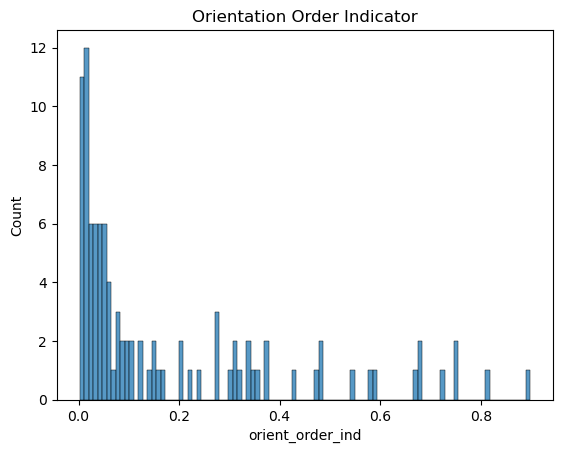

In [422]:
# Orientation Order Indicator
sns.histplot(urban_data['orient_order_ind'], bins=100,kde=False)
plt.title('Orientation Order Indicator')
plt.show()

**Above hsitogram shows distribution of values for the feature 'Orientation Order Indicator'. This feature tells us if the layout of the street in the region has a grid-like layout or not. Having a grid-like layout helps for people/cars to move around in a much better way, thus making it convenient for them as compared to cities not having a grid-like layout. It helps in connectivity of the street in a city's street network** 
**Having a well-connected city is a more planned city. As seen above, there are many cities having low values for this feature and there are a few with a bit higher values**

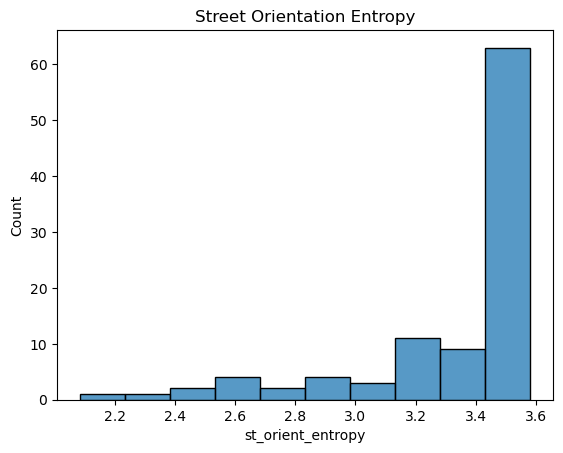

In [423]:
# Street Orientaiton Entropy

sns.histplot(urban_data['st_orient_entropy'], bins=10,kde=False)
plt.title('Street Orientation Entropy')
plt.show()

**Above plot shows the distribution of Street Orientation Entropy values**

**Street Orientation Entropy is an important factor in urban street network planning. It tells how much order is present within the layout of the street network in a city. When the layout is in the form of a grid, the layout is considered as an ordered one having less randomness. Reson being, it is easier to navigate when the layout is in a geometrical shape avoiding chaos for commuters due to traffic congestion.**

**The street layout is considered as an ordered one when the Street Orientation Entropy has a low value**

**As seen above, there are many cities having a greater value for this feature**

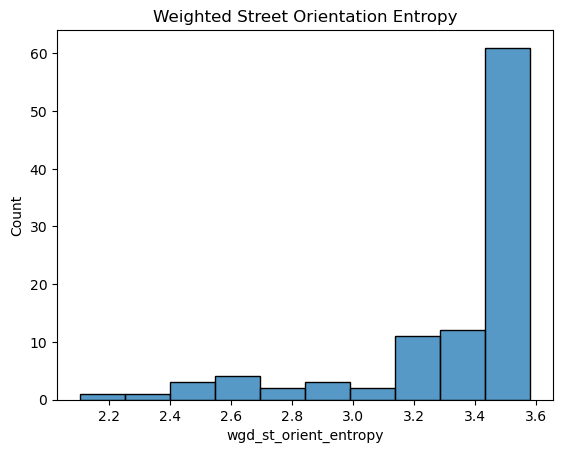

In [424]:
# Weighted Street Orientation Entropy

sns.histplot(urban_data['wgd_st_orient_entropy'], bins=10,kde=False)
plt.title('Weighted Street Orientation Entropy')
plt.show()


**The above histogram shows distribution of values for the feature Weighted Street Orientation Entropy. Weighted Street Orientation entropy tells us how well connected the street in a city are**

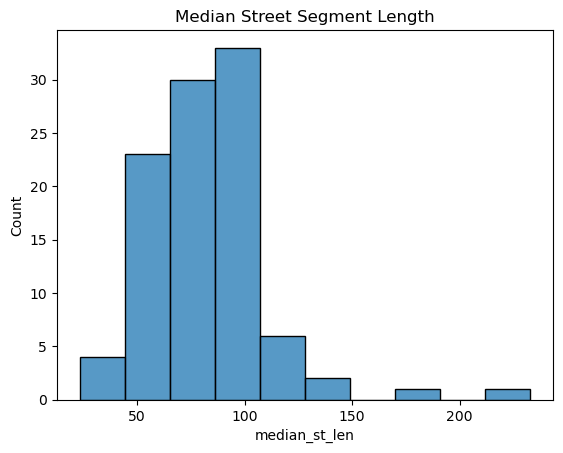

In [425]:
# Median Street Segment Length

sns.histplot(urban_data['median_st_len'], bins=10,kde=False)
plt.title('Median Street Segment Length')
plt.show()

**Above plot shows the distribution of Median Street Length values. This has information about the length of the street in each city**

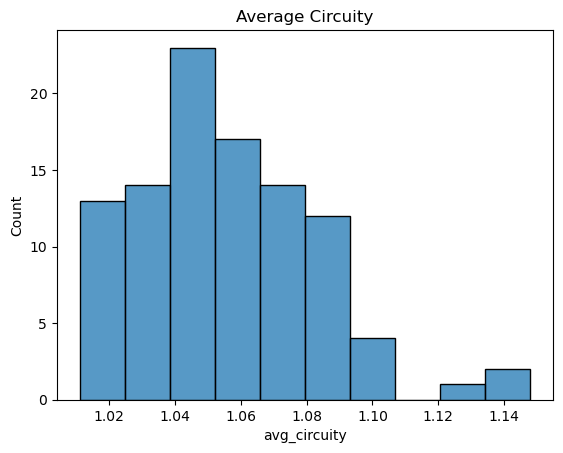

In [426]:
# Average Circuity

sns.histplot(urban_data['avg_circuity'], bins=10,kde=False)
plt.title('Average Circuity')
plt.show()

**Above is the value distribution of the feature Average Circuity. This feature can let us know what route does an individual have to take from point A to point B and how much longer that route would be as compared to the route which would have been computed after drawing a straight line from A to B.**

**If the value of this feature is low, it means that there is grid-like structure which would have a shorter route as compared to a city having a non-grid like structure**

**As seen above, there are few cities having high values**

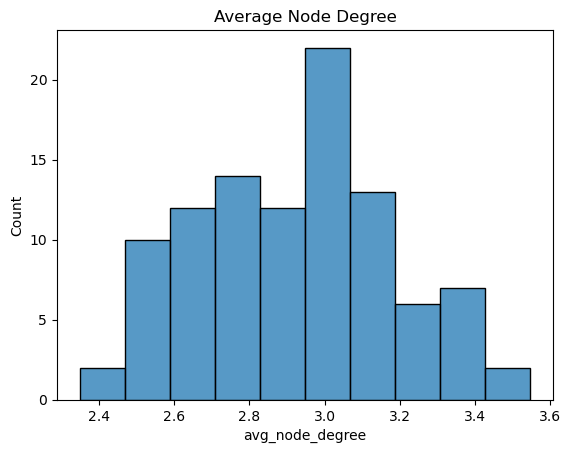

In [427]:
# Average Node Degree

sns.histplot(urban_data['avg_node_degree'], bins=10,kde=False)
plt.title('Average Node Degree')
plt.show()

**Above plot shows distribution of Average Node Degree**

**This feature has information about the interconnectivity of a street network. A city having more dense and interconnected street network is a result of it having streets with many intersections**

**When a street has many intersections, it helps in navigating the traffic. This is a sign of a city having good connectivity**

**Above plot shows that there are cities with values across all range**

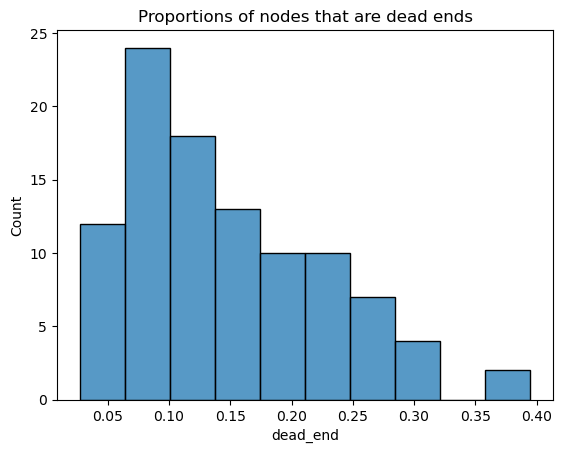

In [428]:
# Proporitons of nodes that are dead-ends

sns.histplot(urban_data['dead_end'], bins=10,kde=False)
plt.title('Proportions of nodes that are dead ends')
plt.show()

**Above plot shows distribution of values for feature Proportion of nodes that are dead-ends**

**A street can have many nodes and the ones that are found at the end of the street are dead-ends. Having more number of dead-ends shows that the city does not have a good connectivity which can lead to inconvenience for walkers and commuters**

**Above plot shows that there are cities with values in almost every range which indicates that there are few cities with less dead ends and there are cities with more dead ends as well**

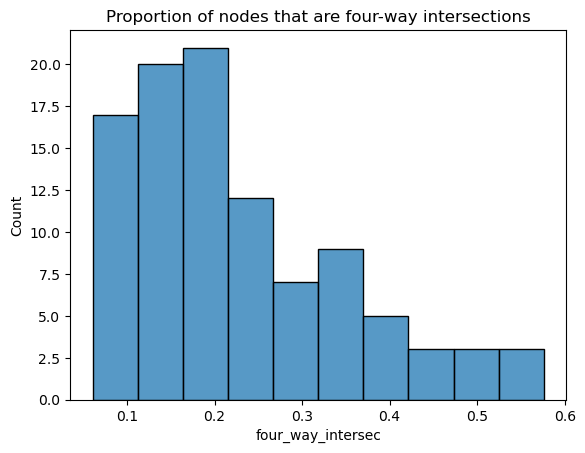

In [429]:
# Proprtion of nodes that are four-way intersections

sns.histplot(urban_data['four_way_intersec'], bins=10,kde=False)
plt.title('Proportion of nodes that are four-way intersections')
plt.show()

**Above histogram shows value distribution for the column Proportion of nodes that are four-way intersections**

**A four-way intersections is where there is an interaction amongst four-streets. Having four-way intersection helps in having a well-connected street network**

**As seen above, there are few cities with many four-way intersections while there a few with less of that**

**Below is a chart for categorical feature 'Region' and the mean of Street Orientation Entropies for all the regions**

In [430]:
region_urban_data = urban_data[['Region', 'st_orient_entropy']]
region_urban_data

,Region,st_orient_entropy
0,Asia/Oceania,3.465
1,Asia/Oceania,3.177
2,Asia/Oceania,3.573
3,Asia/Oceania,3.571
4,Asia/Oceania,3.391
...,...,...
95,US/Canada,2.542
96,US/Canada,3.256
97,US/Canada,2.980
98,US/Canada,2.488


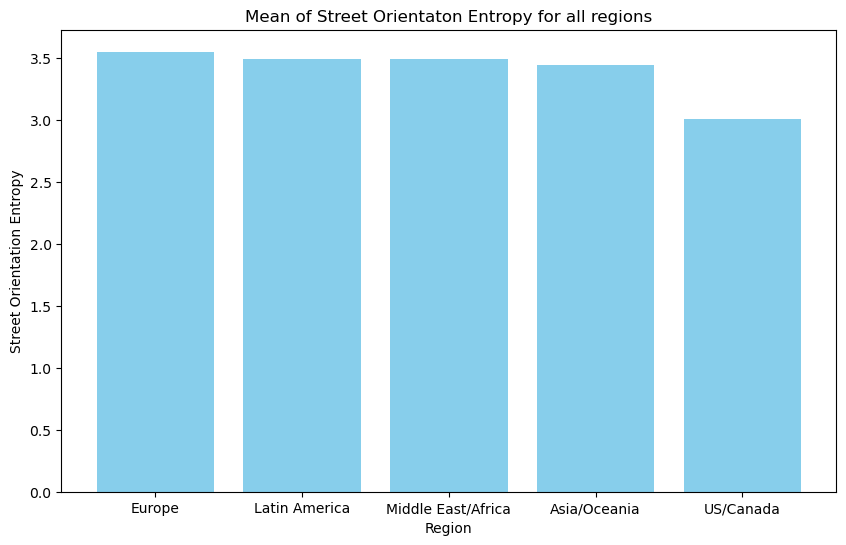

In [431]:
region = region_urban_data.groupby(['Region'])
street_or_entropy = region['st_orient_entropy'].mean()
entropy_sort = street_or_entropy.sort_values(ascending=False)
top_five_street_or_entropy = entropy_sort.head()

# Bar chart
plt.figure(figsize=(10,6))
plt.bar(top_five_street_or_entropy.index,top_five_street_or_entropy.values, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Street Orientation Entropy')
plt.title('Mean of Street Orientaton Entropy for all regions')
plt.show()

**As seen from the plot above, US/Canada region has the lowest mean value of Street Orientation Entropy which tells us that there are many cities in this region having a more grid-like structure resulting in more order throughtout the street network across the city. On the other hand, Europe region has a higher value of Street Orientation Entropy which indicates that there is less connectivity**

**Below is a chart showing the Orientation Order Indicator for all the regions**

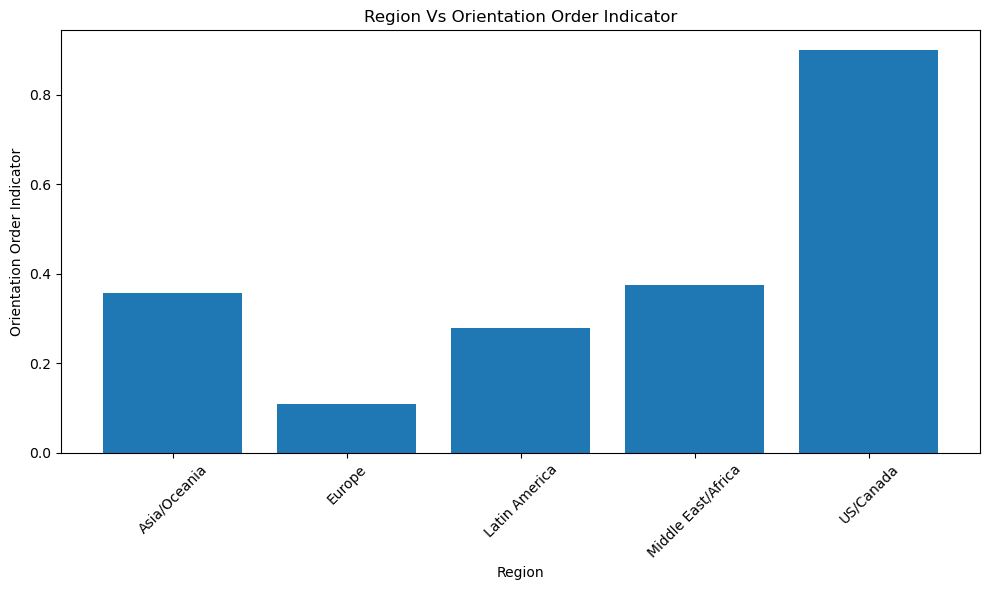

In [432]:
plt.figure(figsize=(10,6))
plt.bar(urban_data['Region'], urban_data['orient_order_ind'])

plt.title('Region Vs Orientation Order Indicator')
plt.xlabel('Region')
plt.ylabel('Orientation Order Indicator')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**As seen from the plot above, it is clear that Europe has the lowest mean value for it indicating that the regions in Europe does not have a grid-like layout. This shows that this region does not have a great street connectivity**

**A region with higher value for this feature indicates that it has better connectivity because it has more grid-like layout**

**Below is a chart showing the average circuity for all the regions**

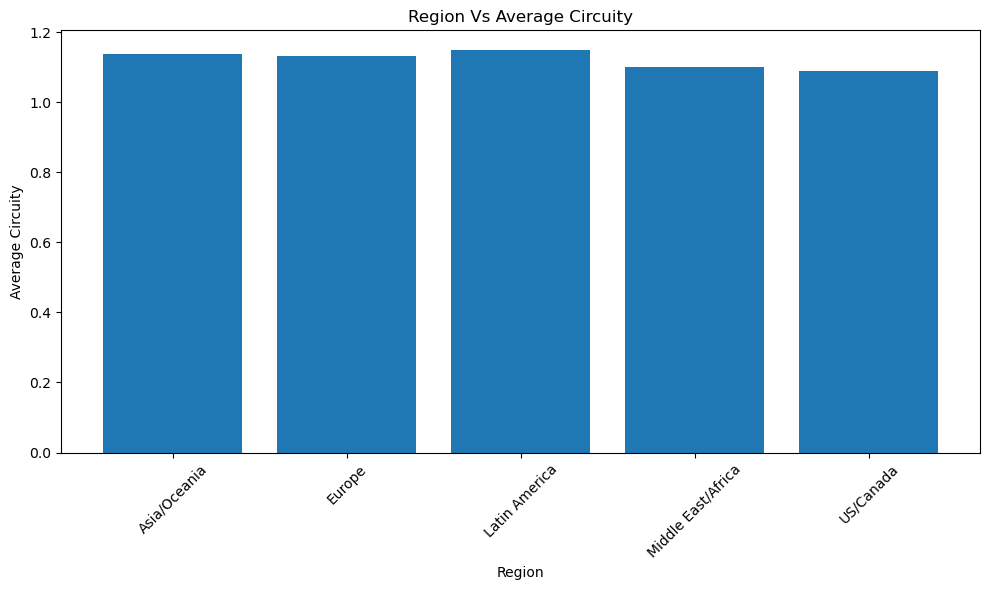

In [433]:
plt.figure(figsize=(10,6))
plt.bar(urban_data['Region'], urban_data['avg_circuity'])

plt.title('Region Vs Average Circuity')
plt.xlabel('Region')
plt.ylabel('Average Circuity')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**As seen in the plot, average circuity is the lowest for US/Canada region. This shows that this region has a more grid-like structure than other regions, making it a well-connected region**

In [434]:
# Checking mean and median values for features
mean_value_orientation_order_indicator = urban_data['orient_order_ind'].mean()
print("Mean: ", mean_value_orientation_order_indicator)

median_value_orientation_order_indicator = urban_data['orient_order_ind'].median()
print("Median: ", median_value_orientation_order_indicator )

Mean:  0.17878999999999998
Median:  0.062


**3. Preprocessing the data: Standardization**

**For numeric values, I am using Standardization as a scaling technique for this dataset as they do not have a uniform scale which can give wrong clustering results if not scaled properly**

**For categorical values, using One Hot Encoding. One of the categorical feature in the dataset is 'City'. The scalar values for it would be 1-100. Disatnce caluculation would be inaccurate with such high cardinality. Also, a city with value 100 could be clustered differently as compared to a city with value 1. To make sure that one feature does not dominate another and does not end up getting more weightage, it is important to perform this operation to get correct clustering results.**

**You can see the One Hot Encoder has encoded categorical values into multiple columns**

In [435]:
# We need to standardize numerical values and categorical values.
numerical_cols = [
 'orient_order_ind',
 'st_orient_entropy',
 'wgd_st_orient_entropy',
 'median_st_len',
 'avg_circuity',
 'avg_node_degree',
 'dead_end',
 'four_way_intersec']
categorical_cols = [
 'Region',
 'City']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ],
    sparse_threshold=0)

# Create a preprocessing pipeline.
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data.
preprocessed_data = pipeline.fit_transform(urban_data)

# Convert the preprocessed data to a DataFrame that will be used for clustering.
preprocessed_df = pd.DataFrame(preprocessed_data)
preprocessed_df

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.330477,0.353647,0.335401,-0.661487,0.111372,-2.045566,2.665745,-0.956809
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.699605,-0.541898,-0.396254,3.399520,-0.109897,0.235734,-0.157872,0.102948
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.755946,0.689477,0.692306,-0.668681,0.332640,-1.190078,1.235113,-1.004618
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.746989,0.683258,0.665538,-0.790979,2.987859,0.034220,-0.421409,-0.430915
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.052803,0.123542,0.023110,-1.085933,0.332640,-0.691994,0.344105,-1.052426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.437309,-2.516451,-2.573373,0.511133,-1.031848,0.699599,-0.145322,1.122864
96,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.435367,-0.296245,-0.339744,0.863638,-1.216238,0.920124,-0.622200,1.162705
97,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.322133,-1.154476,-1.350974,0.723356,1.254591,0.269954,-0.484156,-0.088287
98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.553753,-2.684366,-2.754799,0.744938,-1.253116,1.463834,-0.935935,1.808120


**4. Importance of maintaing a uniform scale across the variable for K-means and Hierarchical clustering:**

**It often happens that the numeric columns needed for the implementation of the clustering can be in different scales. Meaning, they tend to have values in various different ranges. This leads to values of one feature getting more weightage over the value from other feature when clearly there is no such correlation. In such scenarios, it becomes crucial to have a uniform scale across all the variables so each column gets equal weightage while implementing clustering, still maintaing the variation amongst them.**

**5. Is there any need to use scaling techniques for this dataset?**

**Yes, there is a need to use scaling techniques for this dataset. I have used Standardization technique for this dataset as the values in numeric features have a different scale as mentioned earlier.**

**It is crucial for the numeric features to have a uniform scale to be able to implement clustering on it. No scaling would give wrong clustering results**

**Standardization has been performed and explained above in point number 3**

**6. Below is the implementation of the K-means clustering**

In [436]:
def kmeans(data_frame, num_clusters=5, tolerance=1e-4, max_iter=300):
    
    # Make a temp copy.
    temp_df = data_frame.copy()
    
    # Distances across iterations.
    dists = []
    
    # Initiate centroids by selecting k random samples from data set.
    centroids = data_frame.sample(num_clusters)

    for it_id in range(max_iter):
        # Calculate distance and new centroids
        centroids, dist = calculate_centroids(temp_df, centroids) 
        temp_df['centroid'] = centroids
        dists.append(sum(dist))

        if it_id > 0:
            if dist[it_id-1] - dist[it_id] <= tolerance:
                break
        
        # Calculate the new centroid position by taking the mean of all closet data sets.
        centroids = temp_df.groupby('centroid').agg('mean').reset_index(drop = True)

    return temp_df['centroid'], dist

def calculate_centroids(data_frame, centroids):

    num_clusters = centroids.shape[0]
    num_rows = data_frame.shape[0]
    closest_centroids = []
    closest_centroid_dists = []

    for row_id in range(num_rows):
        # Calculate squared euclidian distance between all centroids and this data row.
        dists = np.array([])
        for centroid in range(num_clusters):
            dist = np.square(np.sum((centroids.iloc[centroid, :]- data_frame.iloc[row_id,:])**2))
            dists = np.append(dists, dist)

        # Calculate nearest centroid and distance.
        closest_centroid_dist = dists[0]
        closest_centroid = 0
        for i, dists in enumerate(dists):
            if dists < closest_centroid_dist:
                closest_centroid_dist = dists
                closest_centroid = i

        # Update closest centroid for this data row.
        closest_centroids.append(closest_centroid)
        closest_centroid_dists.append(closest_centroid_dist)

    return closest_centroids, closest_centroid_dists

**7. Below is the elbow method that is used to deternine the number of clusters**

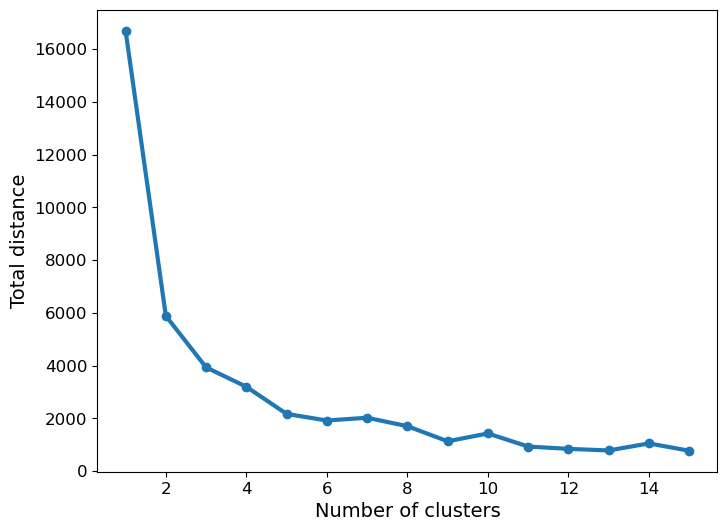

In [437]:
dist_total = []
n = 15

# For each cluster size, calculate sum of squared euclidian distances for 
# all data points from their nearst centroids.
for i in range(n):
    _, dists = kmeans(preprocessed_df, i+1)
    dist_total.append(sum(dists))
    
# Plot an elbow curve using the distances against number of clusters.
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total distance', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [438]:
# We will choose 8 clusters from the elbow plot as it plateus after that.

df_centroids, _ = kmeans(preprocessed_df, 8)

# Now that we have the clustering available. Lets assign it to the original data set for further analysis.
kmeans_clust_urban_data = urban_data.copy()
kmeans_clust_urban_data['Cluster'] = df_centroids
kmeans_clust_urban_data

,Region,City,orient_order_ind,st_orient_entropy,wgd_st_orient_entropy,median_st_len,avg_circuity,avg_node_degree,dead_end,four_way_intersec,Cluster
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108,3
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241,1
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102,3
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174,0
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096,0
...,...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369,6
96,US/Canada,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374,7
97,US/Canada,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217,7
98,US/Canada,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455,6


**Question 11 has asked to generate cluster solution by grouping the cities into different groups based on similarity - The answer to this question is the table below for K-means clustering.**

**K-means clustering has been implemented using all columns. For better visualization purpose, selecting few columns that can be seen in the table below to visualize grouping of the data**

**Insights:**

**a) Below table clearly shows that the 100 cities are grouped into 8 clusters, ie the table shows cluster formation by cities. It can be seen that Cluster 3 has region US/Canada with cities Chicago, Denver, Detroit, Manhattan, Miami, Minneapolis, Portland, Seattle and Vancouver. Cities in this cluster have the lowest Street Orientation Entropy which showcases how well ordered the street networks are in these cities, thus reducing randomness and increasing convenience for commuters. One good example of a well-palnned city in this cluster is Chicago which has grid like layout, is well-connected thus making it the most well planned city with good street network. This can be due to it being a new city and having more scope for planning the layout properly. These cities also have low average circuity which tells us how well connected these cities are due to the presence of grid-like structures in the layout of the street networks**

**b)On other hand, as seen in cluster 1, there are a couple of cities from Europe, Asia and Latin America that belong to a same cluster for being similar with regards to having high Street Orientaiton Entropy. This shows that these cities are disordered with respect to the street network making it difficiult for commuters and walkers. Venice, that is present in cluster 1 is the only city with no roads and one needs to get around using boats. This clearly shows that there is no ordered structure present, making it belong to a cluster where other cities have a similar problem. Additionally, their average circuity too is higher making it clear that they do not have a grid like layout thus, making them less planned cities**

In [440]:
pd.set_option('display.max_colwidth', 100)

df_cluster_group = kmeans_clust_urban_data.groupby('Cluster').agg({'Region': lambda x: x.value_counts().to_dict(), 'City': list, 'avg_circuity': 'mean', 'orient_order_ind': 'mean', 'st_orient_entropy': 'mean', 'avg_node_degree': 'mean', 'four_way_intersec': 'mean'}).reset_index()
df_cluster_group

,Cluster,Region,City,avg_circuity,orient_order_ind,st_orient_entropy,avg_node_degree,four_way_intersec
0,0,{'Asia/Oceania': 3},"[Hong Kong, Jakarta, Kyoto]",1.097333,0.178667,3.370000,2.853333,0.142333
1,1,"{'Asia/Oceania': 3, 'Europe': 1, 'US/Canada': 1}","[Beijing, Pyongyang, Shanghai, Kiev, Charlotte]",1.062000,0.099200,3.466200,2.777000,0.195400
2,2,"{'Europe': 2, 'Latin America': 1, 'US/Canada': 1}","[Berlin, Moscow, Buenos Aires, New Orleans]",1.035250,0.073000,3.500750,3.231750,0.382750
3,3,"{'Europe': 9, 'Asia/Oceania': 8, 'Middle East/Africa': 5, 'Latin America': 2, 'US/Canada': 1}","[Bangkok, Hanoi, Kabul, Kathmandu, Mumbai, New Delhi, Sydney, Ulaanbaatar, Dublin, Glasgow, Hels...",1.079280,0.042800,3.535520,2.598560,0.108080
4,4,"{'Europe': 7, 'Asia/Oceania': 5, 'Latin America': 3, 'Middle East/Africa': 3, 'US/Canada': 1}","[Karachi, Manila, Melbourne, Osaka, Taipei, Athens, Barcelona, Budapest, Madrid, Munich, Paris, ...",1.036053,0.135895,3.424579,3.109737,0.284895
5,5,"{'Europe': 6, 'Middle East/Africa': 6, 'Asia/Oceania': 3, 'Latin America': 3, 'US/Canada': 2}","[Seoul, Singapore, Tokyo, Amsterdam, Copenhagen, Lisbon, Prague, Rome, Warsaw, Bogota, Rio de Ja...",1.061550,0.030600,3.549450,2.906350,0.175950
6,6,{'US/Canada': 9},"[Chicago, Denver, Detroit, Manhattan, Miami, Minneapolis, Portland, Seattle, Vancouver]",1.023667,0.726556,2.518111,3.280889,0.450667
7,7,"{'US/Canada': 14, 'Asia/Oceania': 1}","[Phnom Penh, Atlanta, Baltimore, Cleveland, Dallas, Houston, Las Vegas, Los Angeles, Orlando, Ph...",1.049600,0.383467,3.105067,3.014933,0.278867


**Question 12 (K-means) is asking to investigate and comment on the clusters. The table above answers Questions 12 as well for K-means clustering. Please find below the explanation for it:**

**Taking into consideration features like street orientation entropy and average circuity for gaining more insights on clusters formed after implementing K-means clustering:**

**Cluster 0: This cluster has cities from many regions. It has cities like Nairobi and Charlotte, maeans it's a mix belonging to various regions of US/Canada and 'Middle East/Africa. The street orientation entropy for these is quite high which shows that they are disordered. This means that grid-like layout is not being followed in the street network which leads to commotion on the road leading to incovenience to people due to traffic jams. Thsi also means that there is less connectivity with less four-way intersections. This could be because of various reasons like population or economic conditions.**

**Cluster 1: It has cities like Helsini and Venice. Their average circuity is nto very low which shows the connectivity amongst the street of this city is not great. For Venice, this could be as the way to get around the city is by boats due to which grid-like structure is not possible. So, in this case, geography play an important role. Same is applicable to other cities present in this cluster that the amount of connectivity is less.**

**Cluster 2: This cluster has 14 cities from region US/Canada. This cluster has formed grouping of these cities on a common ground of having the lowest entropy and low average circuity. Cities like Chicago and Miamia are present in this cluster. These cities have a grid-like alyout resulting in more connectivity. Presence of more foru-way intersections and less dead-ends also play a crucial role in making cities of this cluster well-connected. Probability of people getting stuck in traffic is less. Similarly, it is easier for people to get around quickly even if they are walking.**

**Cluster 3: It has cities like Karachi and Paris. It has low average circuity values but have high entropy values. Due to this, the connectivity is not very bad but if grid-like layout is included, the street connectivity would improve a lot.**

**Cluster 4: It has cities like Mumbai and New Delhi. Cities in this cluster have high values for both average circuity and entropy. If we take an example of Mumbai and New Delhi, these are quite old cities in age. Introducing grid-like layout is nearly impossibel making the connecitvity bad in these cities. Having more four-way intersections and reducing the dead-ends could help make these cities a bit more connected.** 

**Cluster 5: It has cities like Berlin and Rome. Average circuity values of cities belonging to this cluster isn't very high making it relatively better street connectivity wise. But the entropy levels for these cities is not very low. In this case too, introducing grid-like layout might help with navigating the traffic in a better way.**

**Cluster 6: It has cities like Los Angeles and San Francisco. Cities in this cluster have quite low values for both entropy and average circuity. This makes the cities in this cluster quite well connected. Having more four-way intersections in such big cities like these helps in avoiding congestion at most places.**

**Cluster 7: It has grouped cities like Caracas which has quite high values for features. This shows that the cities in this cluster are not well connected and afte introducing grid-like layout, the connectivity of these citite could be improved.**


**Additionally, with regards to Question 12 for K-means clustering, please find an answer to it below in the form of few visualizations. These visualizations are drawn after implemetation of K-means clustering and explains the investigation done on the clusters being formed**


**Below are stacked bar charts that shows groups of data formed by region with respect to numeric features**

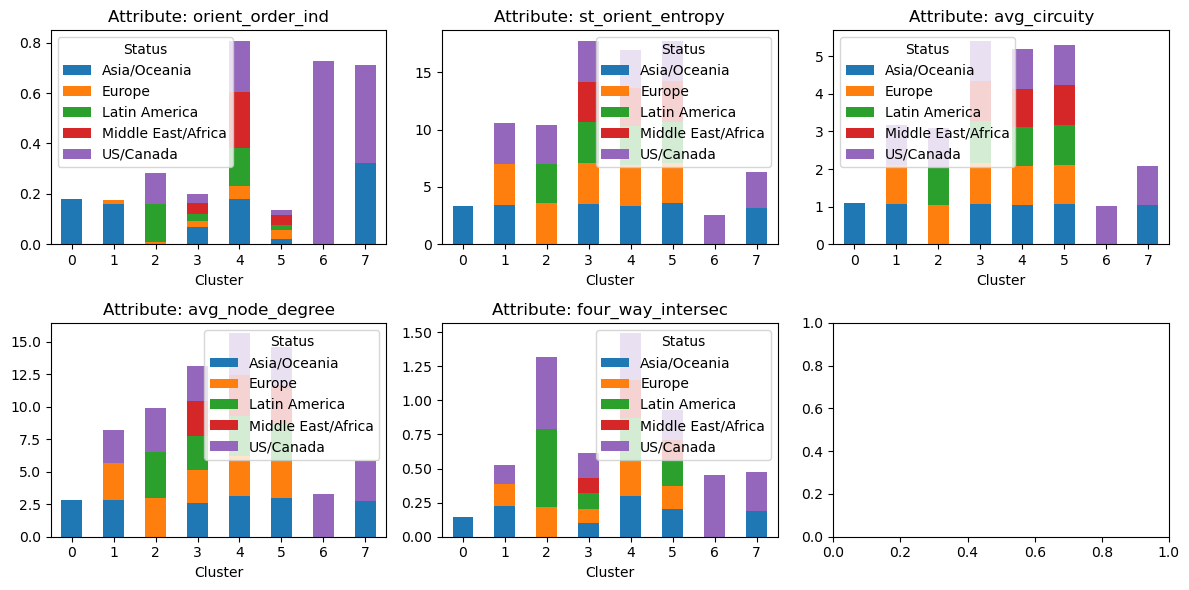

In [441]:
attribute_columns = ['orient_order_ind', 'st_orient_entropy', 'avg_circuity', 'avg_node_degree', 'four_way_intersec']
bar_analysis_df = kmeans_clust_urban_data[['Region', 'Cluster', 'orient_order_ind', 'st_orient_entropy', 'avg_circuity', 'avg_node_degree', 'four_way_intersec']].copy()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

for i, att in enumerate(attribute_columns):
    row = i//3
    column = i%3
    bar_subplot_df = bar_analysis_df[[att, 'Cluster', 'Region']]
    
    df_d = bar_subplot_df.groupby(['Cluster', 'Region'])[att].mean().unstack(fill_value=0)
    df_d.plot(kind='bar', stacked=True, ax=axes[row, column], rot=0)
    
    axes[row, column].set_title(f'Attribute: {att}')
    axes[row, column].legend(title='Status')
    
plt.tight_layout()
plt.show()


**Insights:**

**Orientation Order Indicator:**

**First subplot shows grouping of clusters based on indiacator values that are similar to each other. Cluster 0 has few cities from regions Middle East/Latin America, US/Canada, Asia/Oceania that are clubbed together for having similar values. Cluster 2 has cities belonging to region US/Canada which shows that cities in this region grouped together are well-connected. Similarly, in cluster 6, there are couple of cities from Asia/Oceania and US/Canada that are grouped together. This shows that there are cities like Atlanta, Orlando and Beijing that are not the best well-connected cities and have values similar to each other due to which they are grouped togther in this cluster.**

**One other subplot talk plots details about four-way intesections. There is one cluster being formed which just has one region US/Canada. This shows that the cities in this region have similar values for this feature ie, a low value. This indicates that the cities in this cluster have great connectivity**

**Similarly, rest of the subplots showcases how clusters are formed based on the attributes and cities having similar values for it**

**Below is a scatter plot showing regions that are grouped together based on street orientation entropy and average circuity**

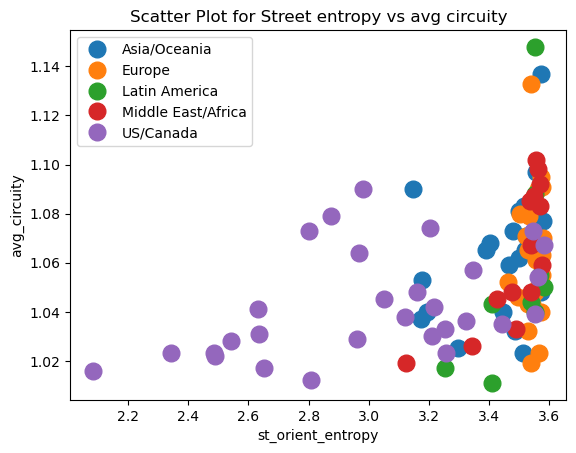

In [442]:
scatter_analysis_df = kmeans_clust_urban_data[['Region', 'st_orient_entropy', 'avg_circuity']].copy()

scatter_analysis_df = scatter_analysis_df.groupby('Region')

for name, group in scatter_analysis_df:
    plt.plot(group.st_orient_entropy, group.avg_circuity, marker='o', linestyle='', markersize=12, label=name)

plt.xlabel('st_orient_entropy')
plt.ylabel('avg_circuity')
plt.title('Scatter Plot for Street entropy vs avg circuity')
plt.legend()


**As seen in the scatter plot above, it is clear that there are few data points that are grouped together for the region US/Canada. This is because, this region has cities that are well-connected (Chicago, Seattle) with low average circuity and low street orientation entropy making them ordered and have grid-like layout. Similarly, US/Canada also has cities that have higher values for these features (Charlotte) making it less-planned**

**There are few clusters being formed for a couple of cities in Europe and Middle East/Africa. This shows that this region too does have few well-planned cities which are being grouped together for a relatively low value for both the features. Whereas, there are also cities in this region that are grouped togther for having higher values and are not well-structured ones.**

**This plot basically shows how the values are distributed and how data points with similar value form clusters.**

**Question 8: Please find below the implementation of Hierarchical clustering**

In [443]:
import math
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
 
class AgglomerativeClustering:
    def __init__(self, data, num_clusters, linkage_method):
        self.data = data
        self.num_clusters = num_clusters
        self.linkage_method = linkage_method
        self.clusters_map = {}
        self.linkage_matrix = []

    def _euclidian_distance(self, c1, c2):
        # Calculate eulidian distance between 2 clusters.
        return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(c1, c2)]))

    def _calculate_distance(self, method, cluster_i, cluster_j):
        if method == "single":
            # Calculate minimum distance between 2 clusters.
            return min([self._euclidian_distance(vector_i, vector_j) for vector_i in cluster_i for vector_j in cluster_j])
        elif method == "complete":
            # Calculate maximum distance between 2 clusters.
            return max([self._euclidian_distance(vector_i, vector_j) for vector_i in cluster_i for vector_j in cluster_j])
        elif method == "average":
            # Calculate average distance between 2 clusters.
            distances = [self._euclidian_distance(vector_i, vector_j) for vector_i in cluster_i for vector_j in cluster_j]
            return sum(distances) / len(distances)
        elif method == "centroid":
            # Calculate distance between centroids for the 2 clusters.
            mean_vectori = np.mean(cluster_i, axis=0)
            mean_vectorj = np.mean(cluster_j, axis=0)
            return self._euclidian_distance(mean_vectori, mean_vectorj)
        else:
            raise ValueError("Invalid linkage criteria specified")
        
    def _assign_cluster_to_all_rows(self):
        # Create cluster map with every row mapped to its own cluster. 
        self.clusters_map = {data_id: [data_point] for data_id, data_point in self.data.iterrows()}
   
    def _find_nearest_clusters(self):
        cluster_ids = list(self.clusters_map.keys())
        
        # Initialize min distance to infinity.
        min_dist = math.inf
        min_dist_clusters = None
        
        # Calculate distance between each cluster and find the minimum.
        for i, cluster_i_idx in enumerate(cluster_ids[:-1]):
            for j, cluster_j_idx in enumerate(cluster_ids[i+1:]):
                dist = self._calculate_distance(self.linkage_method, self.clusters_map[cluster_i_idx], self.clusters_map[cluster_j_idx])
                if dist < min_dist:
                    min_dist, min_dist_clusters = dist, (cluster_i_idx, cluster_j_idx)
        
        # Add an entry to the linkage matrix map like below
        # [ Closest_Cluster_Index_i, Closest_Cluster_Index_j, Min_Distance, Num_Cluster_Elements]
        self.linkage_matrix.append(
            [float(min_dist_clusters[0]),
             float(min_dist_clusters[1]),
             float(min_dist),
             float(len(self.clusters_map[cluster_i_idx]) + len(self.clusters_map[cluster_j_idx]))])
        return min_dist_clusters

    def _merge_clusters_map(self, ci_id, cj_id):
        # Create a new cluster map entry with Id one greater than the max present currently.
        # Associate selected clusters with it.
        new_clusters_map = {max(self.clusters_map.keys()) + 1: self.clusters_map[ci_id] + self.clusters_map[cj_id]}
        
        for cluster_id in self.clusters_map.keys():
            # Skip the closest clusters and add all others with their original cluster index.
            if (cluster_id == ci_id) | (cluster_id == cj_id):
                continue
            else:
                new_clusters_map[cluster_id] = self.clusters_map[cluster_id]
        return new_clusters_map

    def _execute_clustering(self, num_clusters):
        while len(self.clusters_map.keys()) > num_clusters:
            # Find min distance clusters and merge them to the cluster map.
            min_dist_clusters = self._find_nearest_clusters()
            self.clusters_map = self._merge_clusters_map(min_dist_clusters[0], min_dist_clusters[1])
                
    def get_linkage(self):
        self._assign_cluster_to_all_rows()
        self._execute_clustering(1)
        return self.linkage_matrix
    
    def get_clusters(self):
        self._assign_cluster_to_all_rows()
        self._execute_clustering(self.num_clusters)
        
        # Map to 0 based cluster name for readability.
        unique_cluster_ids = set(self.clusters_map.keys())
        new_cluster_dict = {}
        i = 0
        for cluster_id in unique_cluster_ids:
            new_cluster_dict[i] = self.clusters_map[cluster_id]
            i+=1
            
        # Find the cluster association for the data row and add it to cluster_ids array.
        cluster_Ids = []
        for data_id, data_point in self.data.iterrows():
            for cluster_id, values in new_cluster_dict.items():
                for value in values:
                    if (data_point == value).all(axis=0):
                        cluster_Ids.append(cluster_id)
        
        return cluster_Ids
  

**Question 9 and 10 : To try linkage criteria and plot dendogram for each criteria**

**All linkage criteria can be seen below along with dendograms that are plotted for each criteria**

**Single:**

**Dendogram for this linakge criteria shows how the clusters are being formed. Cluster that is shown in green color is the one which has planned cities like Seattle and Chicago. This clearly states that these cities are grouped together for having low entropy and low average circuity values making them a well-connected and well-planned cities**

**It also shows other clusters being formed out of which one cluster, that is represented in orange color, is the one grouped together based on single linkage criteria for having high entropy and high average circuity values. It is clear that they are disordered and not having a good grid-like layout of street networks. Cities like Charlotte, Venice and Kabul are present in this cluster. As mentioned in ealier explanation, these are the cities that can improve on making their street network better and well-connected**

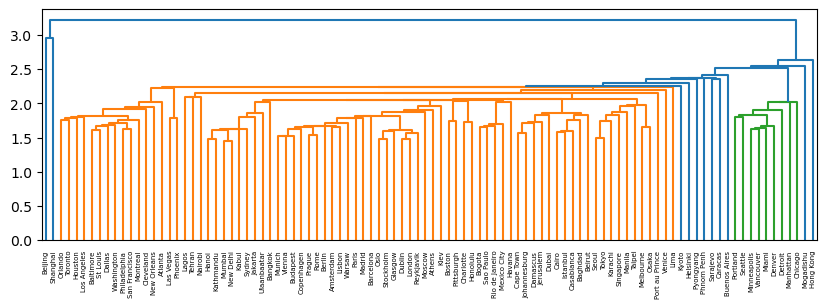

In [444]:
# Initialize the clustering algorithm and create linkate matrix needed to draw dendrogram.
single_hier_clustering = AgglomerativeClustering(preprocessed_df, 8, "single")
single_linkage_matrix = single_hier_clustering.get_linkage()

plt.figure(figsize=(10, 3))
dn = dendrogram(single_linkage_matrix, labels=urban_data['City'].values)

**Complete:**

**Below can be seen cities that are grouped together based on complete linkage criteria. In this dendogram too, there is one cluster formed with well-connected cities like Seattle and Chicago (in purple color). There is another one formed with cities like Charlotte and Atlanta (represented using red color) which do not have ordered network of streets. On similar terms, there is another one formed with cities like Kabul and Tehran (represented using orange color) that have similar values to features making it come under one cluster**

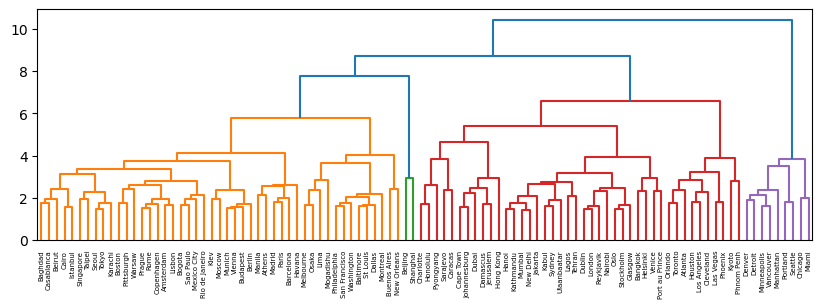

In [445]:
complete_hier_clustering = AgglomerativeClustering(preprocessed_df, 8,  "complete")
complete_linkage_matrix = complete_hier_clustering.get_linkage()

plt.figure(figsize=(10, 3))
dn = dendrogram(complete_linkage_matrix, labels=urban_data['City'].values)

**Average:**

**As seen below, there is one big cluster formed (in orange color) that has cities like Venice, Charlotte, Kabul and Mumbai. It clearly shows that these are the cities that should be grouped together based on the high values of entropy and circuity making it disordered and not well-connected**

**In this one too, there is a group being formed with most well-planned cities like Seattle and Chicago**

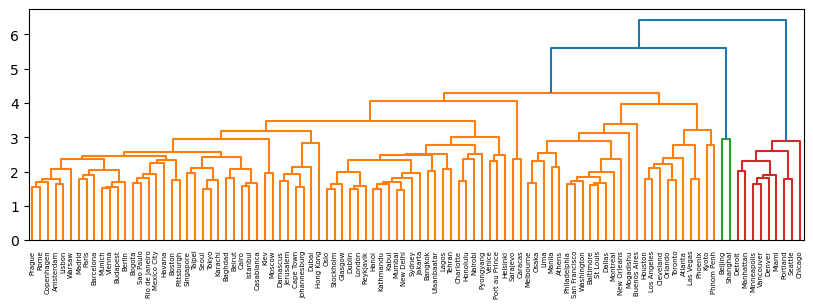

In [446]:
average_hier_clustering = AgglomerativeClustering(preprocessed_df, 8,  "average")
average_linkage_matrix = average_hier_clustering.get_linkage()

plt.figure(figsize=(10, 3))
dn = dendrogram(average_linkage_matrix, labels=urban_data['City'].values)

**Centroid:**

**In this one as well, there is a separate cluster being formed for well-planned cities like Seattle and Chicago**

**There is again one cluster with majority of the remaining cities like Charlotte and Kabul grouped together for having randomness in their street layout** 

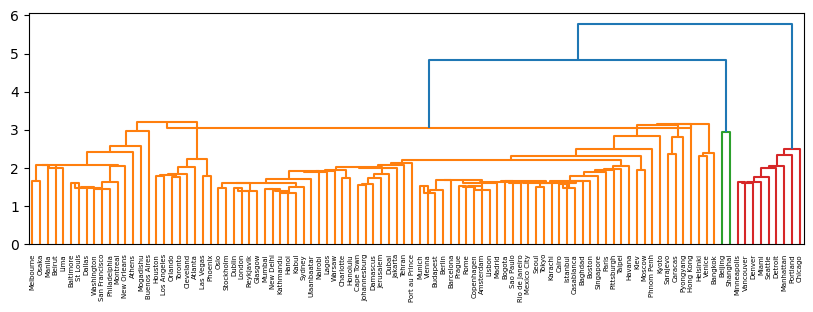

In [447]:
centroid_hier_clustering = AgglomerativeClustering(preprocessed_df, 8, "centroid")
centroid_linkage_matrix = centroid_hier_clustering.get_linkage()

plt.figure(figsize=(10, 3))
dn = dendrogram(centroid_linkage_matrix, labels=urban_data['City'].values)

**Question 11 has asked to generate cluster solution by grouping the cities into different groups based on similarity - The answer to this question is the table below for Hierarchical clustering.**

**Hierarchical clustering has been implemented using all columns. For better visualization purpose, selecting few columns that can be seen in the table below to visualize grouping of the data**

**Insights:**

**Below table clearly shows that the 100 cities are grouped into 8 clusters, ie the table shows cluster formation by cities. Here too, Cluster 3 has region US/Canada with cities Chicago, Denver, Detroit, Manhattan, Miami, Minneapolis, Portland, Seattle and Vancouver. This indicates that these cities have lowest street orientation entropy. It also proves that these cities are well-connected and there is no randomness present. This makes it easy for people reducing their commute time. This cluster has city Chicago, which has really good and planned layout becase of grid-like structure in its layout. As stated earlier, this can be a result of it being a new city and as there is more scope for learning from mistakes that were done in planning of other cities. Cities in this cluster have a low average circuity telling us how greatly connected these cities are due to more four-way intersections, less dead-ends and presence of a grid-like layout in their street networks**

**Whereas, cluster 5 has a couple of cities from almost every region grouped together on the similarity that their values for features like entropy and circuity are quite similar to each other. Cities included in this group are Kabul, Mumbai, Karachi which do not have a grid-like layout. These cities are quite old which might be one of the reason for less-connectivity in the streets of this network**



In [448]:
pd.set_option('display.max_colwidth', 100)

# now that we hace clustering available for all the data rows, we can use the original data.
hier_cluster_urban_data = urban_data.copy()
hier_cluster_urban_data['Cluster'] = centroid_hier_clustering.get_clusters()
df_cluster_group = hier_cluster_urban_data.groupby('Cluster').agg({'Region': lambda x: x.value_counts().to_dict(), 'City': list, 'avg_circuity': 'mean', 'orient_order_ind': 'mean', 'st_orient_entropy': 'mean', 'avg_node_degree': 'mean', 'four_way_intersec': 'mean'}).reset_index()
df_cluster_group

,Cluster,Region,City,avg_circuity,orient_order_ind,st_orient_entropy,avg_node_degree,four_way_intersec
0,0,{'Asia/Oceania': 1},[Hong Kong],1.137000,0.012000,3.571000,2.932000,0.174000
1,1,{'US/Canada': 8},"[Atlanta, Cleveland, Houston, Las Vegas, Los Angeles, Orlando, Phoenix, Toronto]",1.062750,0.457125,3.000250,2.887750,0.215250
2,2,"{'Europe': 2, 'Asia/Oceania': 1}","[Bangkok, Helsinki, Venice]",1.070667,0.042667,3.535333,2.402333,0.105000
3,3,{'US/Canada': 9},"[Chicago, Denver, Detroit, Manhattan, Miami, Minneapolis, Portland, Seattle, Vancouver]",1.023667,0.726556,2.518111,3.280889,0.450667
4,4,"{'Asia/Oceania': 1, 'Europe': 1, 'Latin America': 1}","[Pyongyang, Sarajevo, Caracas]",1.126000,0.030667,3.549333,2.585333,0.114333
5,5,"{'Europe': 21, 'Asia/Oceania': 15, 'Middle East/Africa': 12, 'Latin America': 6, 'US/Canada': 4}","[Hanoi, Jakarta, Kabul, Karachi, Kathmandu, Kyoto, Mumbai, New Delhi, Phnom Penh, Seoul, Singapo...",1.061931,0.055190,3.520483,2.827603,0.164931
6,6,{'Asia/Oceania': 2},"[Beijing, Shanghai]",1.046500,0.228000,3.312000,3.001000,0.279000
7,7,"{'US/Canada': 8, 'Asia/Oceania': 3, 'Latin America': 2, 'Middle East/Africa': 2, 'Europe': 1}","[Manila, Melbourne, Osaka, Athens, Buenos Aires, Lima, Beirut, Mogadishu, Baltimore, Dallas, Mon...",1.029438,0.237125,3.301563,3.235750,0.379625


**Question 12 (Hierarchical) is asking to investigate and comment on the clusters. The table above answers Questions 12 as well for Hierarchical clustering. Please find below the explanation for it:**

**Taking into consideration features like street orientation entropy and average circuity for gaining more insights on clusters formed after implementing Hierarchical clustering:**

**Cluster 0: It has one city Hong Kong. It is the city with highest street orientation entropy due to which it is grouped individually. This tells how disoredered the street network must be.**

**Cluster 1: It has 8 cities from the region US/Canada like Atlanta, Cleveland, Houston, Las Vegas, Los Angeles, Orlando, Phoenix and Toronto. These cities have not so low entropy and circuity values. They have a decent amount of connectivity which can be increased if more grid-like layout is introduced.**

**Cluster 2: This cluster has 2 cities from Europe (Venice, Helsinki) and one from Asia(Bangkok). These cities have average circuity and high entropy indicating that they are not ordered cities. Venice does not have roads and people roam around using boats which is why this city does nto have great street connectivity. Similarly, other two cities also do not have great connectivity among cities. In such cities, it becomes hard for people to walk conveniently.**

**Cluster 3: This cluster has 9 cities from USA and Canada. This cluster has the lowest values for average circuity. These cities are very well-connected having more number fo intersections and less dead-ends. All these afctors contribute towards making these cities a planned one with grid-like layout. SUch cities make it easier for commuters and walkers.** 

**Cluster 4: This cluster has 3 cities form Asia, Latin America and Europe. Values for both the features are high thus, resulting in less grid-like layout and randomness in the street network.**  

**Cluster 5: This cluster has many cities from almost all the regions that have low circuity but high entropy values. HIgh entropy values tells us that grid-like layout is missing. This gives rise to the streets being not great connected with each other.**

**Cluster 6: This cluster has 2 cities from Asia (Beijing and Shanghai). Both these cities have low values for entropy and circuity. Thsi clearly shows how well planned and well-connected both these cities are due to which they are grouped together in a separate cluster all by themselves. This also shows that both these cities have ordered and grid-like layout making them mor connected. Such cities make it easy for people to have a comfortable commute.**

**Cluster 7: This cluster too has cities from almost every region like Manila and Athens. They too have a low value for circuity and entropy thus telling us that they are well-connected with good orderness.** 

**Additionally, with regards to Question 12 for Hierarchical clustering, please find an answer to it below in the form of few visualizations. These visualizations are drawn after implemetation of HIerarchical clustering and explains the investigation done on the clusters being formed**

**Below are stacked bar charts for showing the grouping of data based on few numeric features**

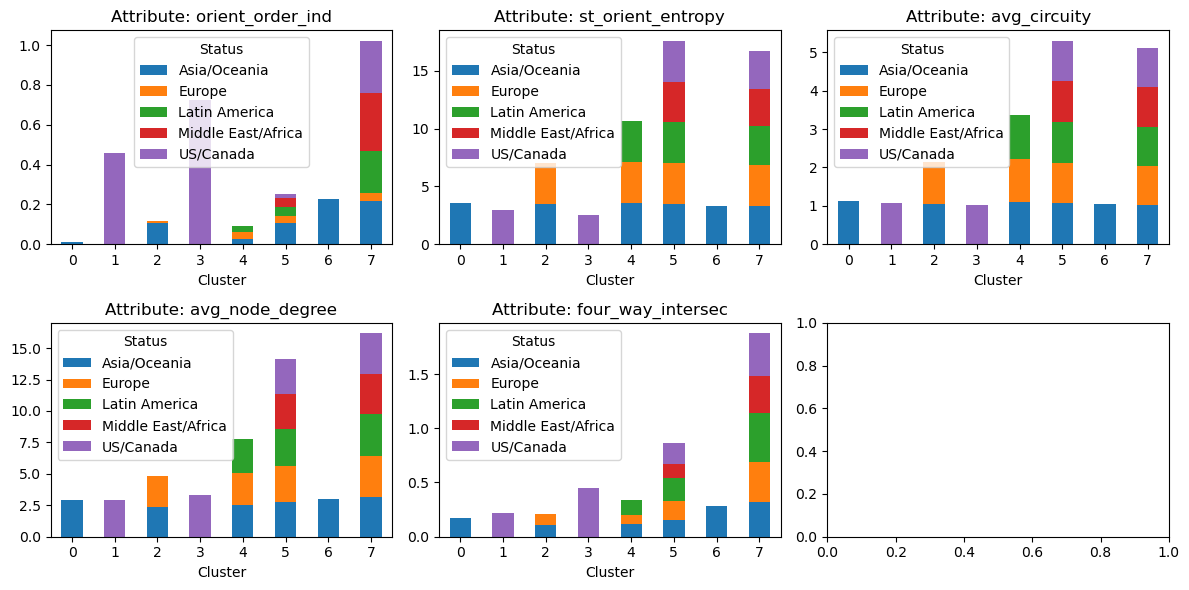

In [449]:
attribute_columns = ['orient_order_ind', 'st_orient_entropy', 'avg_circuity', 'avg_node_degree', 'four_way_intersec']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

for i, att in enumerate(attribute_columns):
    row = i//3
    column = i%3
    bar_subplot_df = hier_cluster_urban_data[[att, 'Cluster', 'Region']]
    
    df_d = bar_subplot_df.groupby(['Cluster', 'Region'])[att].mean().unstack(fill_value=0)
    df_d.plot(kind='bar', stacked=True, ax=axes[row, column], rot=0)
    
    axes[row, column].set_title(f'Attribute: {att}')
    axes[row, column].legend(title='Status')
    
plt.tight_layout()
plt.show()


**As seen with average circuity, there are 2 separate clusters formed for US/Canada regions. This shows that one of the cluster would have cities like Seattle and Chicago with low average circuity, thus a well-ordered one. Another cluster formed for this cluster would have cities like Charlotte, where the values are not the desired ones required for a well-connected city**

**For attribute orientation order indicator too, there can be seen 2 separate clusters being formed for US/Canada regions. It has another cluster with cities from almost every region. This shows that there are cities present in every region that have ordered as well as disordered street networks. In this case, cities with values similar to each other for this attribute are grouped together. It can also mean that some of these cities might have more population or could be old due to which they do not have much scope for making a grid-like layout for better connectivity**

**Below is a scatter plot showing how the data points are grouped based on features average circuity and street orientation entropy**

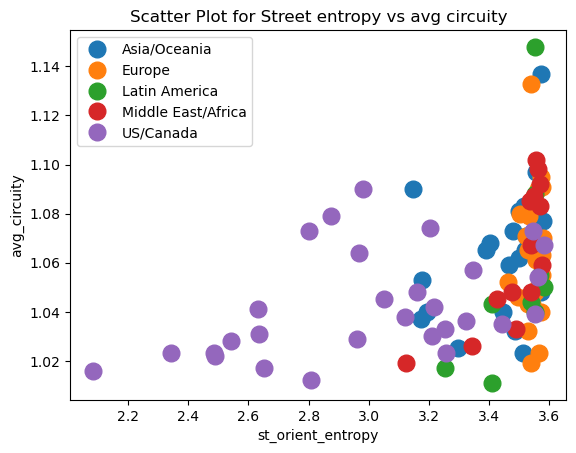

In [450]:
scatter_analysis_df = hier_cluster_urban_data[['Region', 'st_orient_entropy', 'avg_circuity']].groupby('Region')

for name, group in scatter_analysis_df:
    plt.plot(group.st_orient_entropy, group.avg_circuity, marker='o', linestyle='', markersize=12, label=name)

plt.xlabel('st_orient_entropy')
plt.ylabel('avg_circuity')
plt.title('Scatter Plot for Street entropy vs avg circuity')
plt.legend()


**As seen in the plot above, there a 3 data points very close to each other. This can mean that these cities( from regions Latin America, Asia Oceania and Europe) have very high values for both the features. Based on this, they can be grouped together. As mentioned earlier, this can mean this these cities might be having more population or could be older cities where the connectivity isn't good**

**Cities from Middle East/Africa and couple of cities from Europe have similar values for these features as seen in the map. These ones would be grouped togther to form a cluster**


**Few challenges that were faced are mentioned below:**

**One of the challenges faced while starting this project was to understand what each feature stood for and its importance**

**Another one was on deciding the type of scaling this dataset needed**

**Doing research and understading all the terms related to it helped me overcome these challenges**